In [56]:
import pandas as pd
import re
import stanza
stanza.download("lt")
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

2024-11-26 21:03:45 INFO: Downloaded file to /Users/urtejakubauskaite/stanza_resources/resources.json
2024-11-26 21:03:45 INFO: Downloading default packages for language: lt (Lithuanian) ...
2024-11-26 21:03:48 INFO: File exists: /Users/urtejakubauskaite/stanza_resources/lt/default.zip
2024-11-26 21:04:00 INFO: Finished downloading models and saved to /Users/urtejakubauskaite/stanza_resources


In [1]:
#Converting my dataset from .parquet to .csv
df = pd.read_parquet('train-00000-of-00001.parquet')
df.to_csv('train-00000-of-00001.csv')

# Original dataset

In [57]:
# Opening the file
file_path = 'train-00000-of-00001.csv'
data = pd.read_csv(file_path)
print(data.head())

   line_count                            en                  lt
0           1            Meeting in Vilnius  Sutikimas Vilniuje
1           2           That is the address        Štai adresas
2           3       Where does Sigita live?  Kur gyvena Sigita?
3           4  I am looking for Miss Sigita   Aš ieškau Sigitos
4           5                 Just a moment            Minutėlę


In [58]:
# Printing the number of columns
num_columns = data.shape[1]
print(f"The number of columns is: {num_columns}")

The number of columns is: 3


In [59]:
# Getting Lithuanian sentences
sentences = data.iloc[:, -1]
print(sentences.head())

0    Sutikimas Vilniuje
1          Štai adresas
2    Kur gyvena Sigita?
3     Aš ieškau Sigitos
4              Minutėlę
Name: lt, dtype: object


In [60]:
# Splitting rows into sentences and counting words
def split_and_count(sentences):
    all_sentences = []
    for row in sentences:
        split_sentences = re.split(r'[.?!]', row)
        split_sentences = [sentence.strip() for sentence in split_sentences if sentence.strip()]
        all_sentences.extend(split_sentences)
    return all_sentences

# Selecting only the sentences in the original dataset
original_sentences = sentences[1:499]

# Getting a list of all Lithuanian sentences
all_sentences = split_and_count(original_sentences)

# Counting words in each sentence
sentence_lengths = [len(sentence.split()) for sentence in all_sentences]

# Computing the average sentence length
average_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

print(f"Average sentence length for the original dataset is {average_length:.2f} words.")

Average sentence length for the original dataset is 3.75 words.


In [61]:
# Loading the Lithuanian pipeline
nlp = stanza.Pipeline("lt")

# POS tagging
pos_tags = []
for sentence in all_sentences:
    doc = nlp(sentence)
    for sentence in doc.sentences:
        for word in sentence.words:
            print(f"Word: {word.text}, POS: {word.upos}")
            pos_tags.append(word.upos)

2024-11-26 21:04:00 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-11-26 21:04:00 INFO: Downloaded file to /Users/urtejakubauskaite/stanza_resources/resources.json
2024-11-26 21:04:03 INFO: Loading these models for language: lt (Lithuanian):
| Processor | Package          |
--------------------------------
| tokenize  | alksnis          |
| pos       | alksnis_nocharlm |
| lemma     | alksnis_nocharlm |
| depparse  | alksnis_nocharlm |

2024-11-26 21:04:03 INFO: Using device: cpu
2024-11-26 21:04:03 INFO: Loading: tokenize
2024-11-26 21:04:03 INFO: Loading: pos
2024-11-26 21:04:03 INFO: Loading: lemma
2024-11-26 21:04:04 INFO: Loading: depparse
2024-11-26 21:04:04 INFO: Done loading processors!


Word: Štai, POS: PART
Word: adresas, POS: NOUN
Word: Kur, POS: ADV
Word: gyvena, POS: VERB
Word: Sigita, POS: PROPN
Word: Aš, POS: PRON
Word: ieškau, POS: VERB
Word: Sigitos, POS: NOUN
Word: Minutėlę, POS: NOUN
Word: Atsiprašau, POS: VERB
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kas, POS: PRON
Word: Jūs, POS: PRON
Word: Alio, POS: NOUN
Word: ,, POS: PUNCT
Word: aš, POS: PRON
Word: esu, POS: AUX
Word: Jonas, POS: PROPN
Word: Vasiliauskas, POS: PROPN
Word: Aš, POS: PRON
Word: esu, POS: AUX
Word: iš, POS: ADP
Word: Lietuvos, POS: PROPN
Word: Sveiki, POS: ADJ
Word: atvykę, POS: VERB
Word: į, POS: ADP
Word: Vilnių, POS: PROPN
Word: Jums, POS: PRON
Word: užsakytas, POS: VERB
Word: kambarys, POS: NOUN
Word: viešbutyje, POS: NOUN
Word: Viešbutis, POS: NOUN
Word: vadinasi, POS: VERB
Word: ", POS: PUNCT
Word: Žaliasis, POS: ADJ
Word: tiltas, POS: NOUN
Word: ", POS: PUNCT
Word: Viešbutis, POS: NOUN
Word: nedidelis, POS: ADJ
Word: Jis, POS: PRON
Word: mažas, POS: ADJ
Word: ,, POS: PUNCT
Word:

Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: kur, POS: ADV
Word: galėtumėm, POS: VERB
Word: susitikti, POS: VERB
Word: Prie, POS: ADP
Word: pirmo, POS: NUM
Word: prekystalio, POS: NOUN
Word: Kada, POS: ADV
Word: Tiksliai, POS: ADV
Word: dešimtą, POS: NOUN
Word: Ar, POS: PART
Word: tinka, POS: VERB
Word: Kiek, POS: ADV
Word: dabar, POS: ADV
Word: Greitai, POS: ADV
Word: dešimt, POS: NUM
Word: Iki, POS: ADP
Word: Greitai, POS: ADV
Word: pasimatysime, POS: VERB
Word: Turguje, POS: NOUN
Word: Ach, POS: X
Word: ,, POS: PUNCT
Word: kaip, POS: SCONJ
Word: puikiai, POS: ADV
Word: kvepia, POS: VERB
Word: braškės, POS: NOUN
Word: O, POS: CCONJ
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: mano, POS: PRON
Word: mėgstamiausios, POS: ADJ
Word: uogos, POS: NOUN
Word: Bet, POS: CCONJ
Word: Ana, POS: NOUN
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: ne, POS: PART
Word: šviežios, POS: ADJ
Word: Ne, POS: PART
Word: šviežios, POS: ADJ
Word: Kaip, POS: ADV
Word: gaila, POS: ADV
Word: Prie, PO

Word: Viešbutis, POS: NOUN
Word: Astorija, POS: PROPN
Word: ,, POS: PUNCT
Word: Berlynas, POS: PROPN
Word: Kuo, POS: PRON
Word: galiu, POS: VERB
Word: Jums, POS: PRON
Word: padėti, POS: VERB
Word: Ar, POS: PART
Word: turite, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: turime, POS: VERB
Word: Kada, POS: ADV
Word: norėsite, POS: VERB
Word: Rytoj, POS: PRON
Word: vakare, POS: NOUN
Word: iki, POS: ADP
Word: ketvirtadienio, POS: NOUN
Word: ,, POS: PUNCT
Word: vienai, POS: DET
Word: nakčiai, POS: NOUN
Word: Taip, POS: PART
Word: dar, POS: X
Word: turime, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Kokio, POS: DET
Word: Jūs, POS: PRON
Word: norėtumėte, POS: VERB
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Jūsų, POS: PRON
Word: pavardė, POS: NOUN
Word: Vilsonas, POS: PRO

Word: Ach, POS: X
Word: ,, POS: PUNCT
Word: išsiųskite, POS: VERB
Word: mums, POS: PRON
Word: ,, POS: PUNCT
Word: jeigu, POS: SCONJ
Word: Jūs, POS: PRON
Word: jų, POS: PRON
Word: nenorite, POS: VERB
Word: Viso, POS: DET
Word: gero, POS: ADV
Word: Aš, POS: PRON
Word: tiesiog, POS: ADV
Word: nežinau, POS: VERB
Word: ,, POS: PUNCT
Word: ką, POS: PRON
Word: pasakyti, POS: VERB
Word: Bet, POS: CCONJ
Word: ką, POS: PRON
Word: aš, POS: PRON
Word: galiu, POS: VERB
Word: padaryti, POS: VERB
Word: Susitikimas, POS: NOUN
Word: lėktuve, POS: NOUN
Word: Sveika, POS: ADJ
Word: ,, POS: PUNCT
Word: ponia, POS: NOUN
Word: Šmidt, POS: PUNCT
Word: Koks, POS: DET
Word: netikėtumas, POS: NOUN
Word: Jus, POS: PRON
Word: čia, POS: ADV
Word: lėktuve, POS: NOUN
Word: sutikti, POS: VERB
Word: Tikrai, POS: ADV
Word: Kaip, POS: ADV
Word: sekasi, POS: VERB
Word: Puikiai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: Jums, POS: PRON
Word: Kur, POS: ADV
Word: Jūs, POS: PRON
Word: vykstate, POS: VERB
Word: R

Word: Jam, POS: PRON
Word: sekasi, POS: VERB
Word: šiemet, POS: PUNCT
Word: Apibūdinti, POS: VERB
Word: asmenį, POS: NOUN
Word: Ar, POS: PART
Word: negalėtum, POS: VERB
Word: 12, POS: NUM
Word: 57, POS: NUM
Word: sutikti, POS: VERB
Word: mano, POS: PRON
Word: dėdę, POS: NOUN
Word: Aš, POS: PRON
Word: neturiu, POS: VERB
Word: laiko, POS: NOUN
Word: Turi, POS: VERB
Word: galvoje, POS: NOUN
Word: ,, POS: PUNCT
Word: nuo, POS: ADP
Word: stoties, POS: NOUN
Word: Na, POS: INTJ
Word: gerai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kaip, POS: SCONJ
Word: jis, POS: PRON
Word: atrodo, POS: VERB
Word: Jis, POS: PRON
Word: labai, POS: ADV
Word: aukštas, POS: ADJ
Word: ,, POS: PUNCT
Word: apie, POS: ADP
Word: 1,8, POS: NUM
Word: m, POS: NOUN
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: pilnas, POS: ADJ
Word: Ar, POS: PART
Word: jis, POS: PRON
Word: nešioja, POS: VERB
Word: akinius, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: jis, POS: PRON
Word: visada, POS: ADV
Word: a

Word: Aš, POS: PRON
Word: norėčiau, POS: VERB
Word: pamatyti, POS: VERB
Word: porceliano, POS: NOUN
Word: kolekciją, POS: NOUN
Word: Ji, POS: PRON
Word: gana, POS: ADV
Word: garsi, POS: ADJ
Word: Visi, POS: DET
Word: daiktai, POS: NOUN
Word: originalūs, POS: ADJ
Word: ,, POS: PUNCT
Word: iš, POS: ADP
Word: 18, POS: NUM
Word: amžiaus, POS: NOUN
Word: Aš, POS: PRON
Word: girdėjau, POS: VERB
Word: apie, POS: ADP
Word: tai, POS: DET
Word: Tikiuosi, POS: VERB
Word: ,, POS: PUNCT
Word: mes, POS: PRON
Word: jų, POS: PRON
Word: nesudaužysime, POS: VERB
Word: Nesijaudink, POS: VERB
Word: Jie, POS: PRON
Word: visi, POS: DET
Word: po, POS: ADP
Word: stiklu, POS: NOUN
Word: Vėlavimas, POS: NOUN
Word: į, POS: ADP
Word: susitikimą, POS: NOUN
Word: Jau, POS: ADV
Word: 20, POS: NUM
Word: minučių, POS: NOUN
Word: po, POS: ADP
Word: dvyliktos, POS: NOUN
Word: Aš, POS: PRON
Word: Jūsų, POS: PRON
Word: laukiau, POS: VERB
Word: dvyliktą, POS: PROPN
Word: Bet, POS: CCONJ
Word: Jūs, POS: PRON
Word: gi, POS: 

Word: Gal, POS: PART
Word: eisime, POS: VERB
Word: į, POS: ADP
Word: kiną, POS: NOUN
Word: ar, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: dar, POS: PART
Word: gauti, POS: VERB
Word: bilietus, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: ir, POS: CCONJ
Word: pašokti, POS: VERB
Word: nueiti, POS: VERB
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: viską, POS: PRON
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: baletą, POS: NOUN
Word: ir, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: ir, POS: CCONJ
Word: kiną, POS: NOUN
Word: ;, POS: PUNCT
Word: sugalvok, POS: VERB
Word: ,, POS: PUNCT
Word: ką, POS: PRON
Word: mes, POS: PRON
Word: darysime, POS: VERB
Word: Aš, POS: PRON
Word: tiesiog, POS: ADV
Word: norėčiau, POS: VERB
Word: kur, POS: ADV
Word: nors, POS: X
Word: išeiti, POS: VERB
Word: Piteris, POS: PROPN
Word: prisimena, POS: VERB
Word: ,, POS: PUNCT
Word: kaip, POS: SCONJ
Word: sunku, POS: ADJ
Word: prie, POS: ADP
Word: k

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_7262/2182648570.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")


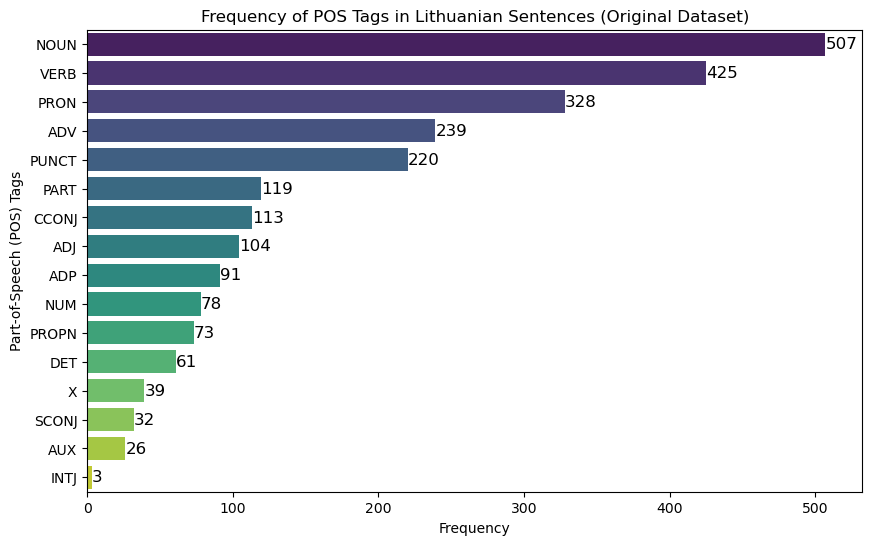

In [65]:
# Counting the frequency of each POS tag
pos_counts = Counter(pos_tags)

# Creating a DataFrame with POS tags and their frequencies
df = pd.DataFrame(pos_counts.items(), columns = ["POS", "Frequency"])

# Sorting the DataFrame by frequency
df = df.sort_values(by = "Frequency", ascending = False)

# Plotting the bar chart
plt.figure(figsize = (10, 6))  # Set the figure size
ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Part-of-Speech (POS) Tags")
plt.title("Frequency of POS Tags in Lithuanian Sentences (Original Dataset)")

# Adding values on the columns
for i, v in enumerate(df["Frequency"]):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)
    
# Saving the graph
plt.savefig('pos_tag_frequency_plot_original.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()

Vocabulary size (original dataset): 994
Number of words that appear only once (original dataset): 674
Words that appear more than once and their frequencies (original dataset): {'štai': 11, 'adresas': 3, 'kur': 15, 'gyvena': 3, 'sigita': 2, 'aš': 70, 'atsiprašau': 4, 'o': 39, 'kas': 15, 'jūs': 37, 'alio': 2, 'esu': 3, 'iš': 9, 'sveiki': 2, 'į': 17, 'jums': 8, 'kambarys': 6, 'viešbutyje': 2, 'viešbutis': 5, 'nedidelis': 2, 'jis': 18, 'mažas': 2, 'bet': 19, 'yra': 7, 'už': 8, 'dešinėje': 3, 'iki': 5, 'jus': 6, 'jūsų': 15, 'laukiau': 2, 'ar': 49, 'turite': 11, 'kambario': 4, 'numeris': 2, 'septintas': 2, 'aukšte': 4, 'puikus': 3, 'viena': 3, 'norite': 5, 'antrą': 2, 'ne': 25, 'ačiū': 20, 'taip': 36, 'būtų': 5, 'gerai': 14, 'ir': 47, 'rankšluostis': 2, 'didelis': 3, 'nuostabu': 2, 'negerai': 3, 'negaliu': 4, 'gatvėje': 3, 'mano': 10, 'labas': 5, 'rytas': 5, 'miegojote': 2, 'oras': 5, 'puiki': 3, 'diena': 8, 'jau': 8, 'gana': 2, 'šilta': 3, 'kiek': 2, 'dabar': 8, 'laiko': 3, 'tuoj': 4, 'deš

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_7262/317885036.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


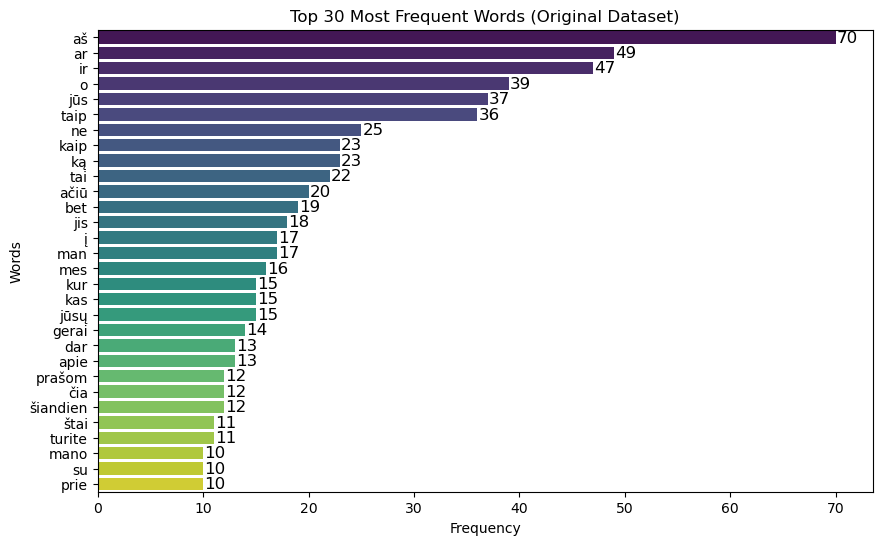

In [66]:
# Vocabulary size & the most frequent words
# Tokenizing the words (+ lowercasing them)
words = []
for sentence in all_sentences:
    words.extend(re.findall(r'\b\w+\b', sentence.lower()))

# Counting the frequency of each word
word_counts = Counter(words)

# Words that appear only once
words_once = [word for word, count in word_counts.items() if count == 1]

# Words that appear more than once and their frequencies
words_more_than_once = {word: count for word, count in word_counts.items() if count > 1}

# Getting the most frequent 30 words
most_common_words = word_counts.most_common(30)

# Separating the words and their frequencies
words, frequencies = zip(*most_common_words)

print(f"Vocabulary size (original dataset): {len(word_counts)}")
print(f"Number of words that appear only once (original dataset): {len(words_once)}")
print(f"Words that appear more than once and their frequencies (original dataset): {words_more_than_once}")

# Plotting the bar chart with the "viridis" color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="viridis")

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words (Original Dataset)')

# Adding values on the columns
for i, v in enumerate(frequencies):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)

# Saving the graph
plt.savefig('top_30_most_frequent_words_plot_original.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()

# Expanded dataset

In [4]:
# Adding additional data
file_path = 'train-00000-of-00001.csv'
data = pd.read_csv(file_path)

# Data to be added
new_data = [['Airplane disaster in Vilnius - what is known about the event?', 
             'Lėktuvo katastrofa Vilniuje – kas žinoma apie įvykį?'],
            ['On Monday morning a plane crash occurred in the capital - in Liepkalnis, near Vilnius Airport, a cargo aircraft "Boeing 737" crashed.', 
             'Pirmadienio rytą sostinėje įvyko lėktuvo katastrofa – Liepkalnyje, netoli Vilniaus oro uosto, nukrito krovininis orlaivis „Boeing 737“.'],
            ['One person was killed in the incident, three were injured, one of them is a Lithuanian.',
             'Per įvykį vienas žmogus žuvo, trys sužeisti, vienas iš jų yra lietuvis.'],
            ['On Monday at 5.28 am received information that a cargo plane crashed in Liepkalnis near the house.',
             'Pirmadienį 5.28 val. ryto gauta informacija, kad krovininis lėktuvas nukrito Liepkalnyje šalia namo.'],
            ['Commercial aircraft flew to Vilnius from Leipzig, Germany.',
             'Krovininis lėktuvas į Vilnių skrido iš Leipcigo, Vokietijos.'],
            ['Before the flight to Vilnius, the plane stood unused for two days, November 23-24, at Leipzig Airport.',
             'Prieš skrydį į Vilnių lėktuvas dvi dienas, lapkričio 23–24 d., Leipcigo oro uoste stovėjo nenaudojamas, nors įprastai orlaiviu buvo skraidoma kasdien.'],
            ['Airplane crashed in Liepkalnis, at the intersection of Žirniai and Liepkalnis streets.',
             'Lėktuvas nukrito Liepkalnyje, ties Žirnių ir Liepkalnio gatvėmis.'],
            ['Company DHL\'s commissioned flights were performed by an aircraft belonging to Spanish airlines "Swiftair".',
             'Bendrovės DHL užsakomuosius skrydžius vykdė lėktuvas, priklausęs Ispanijos oro linijoms „Swiftair“.'],
            ['In the internet, when the pilot\'s and flight commander\'s voice recording appeared, it was noticed that the conversation was completely routine, no signs of panic were recorded.',
             'Internete pasirodžius pilotų ir skrydžio vadovo garso įrašui, pastebėta, kad pokalbis buvo visiškai rutininis, nefiksuota jokių nerimo ženklų.'],
            ['DHL informed that due to the plane crash an investigation has been started.',
             'DHL informavo, kad dėl lėktuvo katastrofos pradėtas tyrimas.'],
            ['An incident occurred in the place where it was seen that the aircraft\'s landing gear touched down more than 100 meters away.',
             'Incidento vietoje buvo matyti, kad orlaivio nuolaužos pažiro net 100 m atstumu.'],
            ['Medical staff arrived on the scene within six minutes.',
             'Medikai į įvykio vietą atvyko per 6 minutes.'],
            ['The head of the Vilnius Emergency Medical Assistance Brigade Service Igoris Lukaševas told LRT Radio that the most serious conditions among the wounded crew members are a 54 and 40-year-old people.',
             'Vilniaus greitosios medicinos pagalbos Išvažiuojamųjų brigadų tarnybos vadovas Igoris Lukaševas LRT RADIJUI teigė, kad iš sužeistų įgulos narių sunkiausia būklė – 54 ir 40 metų asmenų.'],
            ['One of them was at least for a time conscious, spoke English.',
             'Vienas jų bent kurį laiką buvo sąmoningas, kalbėjo angliškai.'],
            ['During flight, they were in the pilot\'s cabin.',
             'Skrydžio metu jie buvo piloto kabinoje.'],
            ['Survived a 34-year-old crew member of Lithuanian nationality at the time of misfortune was in the aircraft cabin, his injuries were lighter.',
             'Išgyvenęs 34 metų amžiaus įgulos narys lietuvis nelaimės metu buvo orlaivio salone, jo sužalojimai lengvesni.'],
            ['The Mayor of Vilnius Valdas Benkunskas informed that a state of local extreme emergency would be declared in the disaster area, which would help to take care of residents, manage the territory and provide assistance.',
             'Vilniaus meras Valdas Benkunskas informavo, kad katastrofos teritorijoje bus paskelbta lokali ekstremalioji situacija, tai padės pasirūpinti gyventojais, teritorijos tvarkymu, pagalbos teikimu.'],
            ['According to the mayor, the health of people affected by air and water pollution is not a problem.',
             'Pasak mero, pavojaus žmonių sveikatai dėl oro, vandens užterštumo nėra.'],
            ['Police department together with the General Prosecutor\'s Office started an investigation into the circumstances of the incident to clarify them.',
             'Policijos departamentas kartu su Generaline prokuratūra pradėjo ikiteisminį tyrimą įvykio aplinkybėms išsiaiškinti.'],
            ['We are investigating all possible causes of the accident.',
             'Tiriamos visos galimos avarijos priežastys.'],
            ['The version of terrorism was not excluded, as on June 19, packages were sent from Lithuania via DHL Lietuva that exploded themselves and caused fires in logistics centers in Leipzig and Birmingham.',
             'Terorizmo versija neatmetama, nes liepos 19 d. iš Lietuvos per „DHL Lietuva“ buvo išsiųsti savaime užsidegantys siuntiniai, jie sukėlė gaisrus logistikos centruose Leipcige ir Birmingame.'],
            ['Only by chance, a cargo in Leipzig was not loaded into the aircraft.',
             'Tik per atsitiktinumą krovinys Leipcige tuomet nebuvo pakrautas į orlaivį.'],
            ['There was no indication that the DHL cargo plane crash in Lithuania could be linked to a warning issued by German authorities over the summer about packages carried on planes with explosive devices.',
             'Visgi pirmadienį popiet Vokietijos vidaus reikalų ministerijos atstovas, kurį citavo „Reuters“, teigė, kad nėra jokių požymių, kad DHL krovininio lėktuvo katastrofa Lietuvoje gali būti susijusi su Vokietijos valdžios institucijų vasarą paskelbtu įspėjimu apie lėktuvais skraidintus paketus su padegamaisiais įtaisais.'],
            ['The lecturer of the Antanas Gustaitis Aviation Institute at Vilnius Gediminas Technical University (VILNIUS TECH) Vincas Šnirpūnas told LRT.lt that there may be more than one reason for such events.',
             'Vilniaus Gedimino technikos universiteto (VILNIUS TECH) Antano Gustaičio aviacijos instituto lektorius Vincas Šnirpūnas LRT.lt teigė, kad tokių įvykių priežasčių gali būti ne viena.'],
            ['However, as he says, in any case it is usually related to human error.',
             'Anot jo, vis dėlto dažniausiai tai susiję su žmogiška klaida.']]

new_df = pd.DataFrame(new_data, columns = ['en', 'lt'])
df = pd.concat([data, new_df], ignore_index = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.insert(0, 'line_count', range(1, len(df) + 1))
df.to_csv(file_path, index = False)

Data has been successfully added and saved.


In [67]:
# Selecting only the newly added data
subset_sentences = sentences[500:]

# Getting a list of sentences from these lines
subset_all_sentences = split_and_count(subset_sentences)

# Counting words in each sentence from the selected subset
sentence_lengths = [len(sentence.split()) for sentence in subset_all_sentences]

# Computing the average sentence length for the subset
average_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

print(f"Average sentence length for newly added dataset is {average_length:.2f} words.")

Average sentence length for newly added dataset is 11.91 words.


Vocabulary size (new dataset): 268
Number of words that appear only once (new dataset) (new dataset): 12
Words that appear more than once and their frequencies (new dataset): {'per': 8, 'įvykį': 3, 'vienas': 6, 'žmogus': 2, 'žuvo': 2, 'trys': 2, 'sužeisti': 2, 'iš': 8, 'jų': 4, 'yra': 2, 'lietuvis': 4, 'pirmadienį': 4, '5': 2, '28': 2, 'val': 2, 'ryto': 2, 'gauta': 2, 'informacija': 2, 'kad': 18, 'krovininis': 5, 'lėktuvas': 10, 'nukrito': 5, 'liepkalnyje': 5, 'šalia': 2, 'namo': 2, 'į': 8, 'vilnių': 4, 'skrido': 2, 'leipcigo': 4, 'vokietijos': 6, 'prieš': 2, 'skrydį': 2, 'dvi': 2, 'dienas': 2, 'lapkričio': 2, '23': 2, '24': 2, 'd': 4, 'oro': 7, 'uoste': 2, 'stovėjo': 2, 'nenaudojamas': 2, 'nors': 2, 'įprastai': 2, 'orlaiviu': 2, 'buvo': 14, 'skraidoma': 2, 'kasdien': 2, 'ties': 2, 'žirnių': 2, 'ir': 8, 'liepkalnio': 2, 'gatvėmis': 2, 'bendrovės': 2, 'dhl': 8, 'užsakomuosius': 2, 'skrydžius': 2, 'vykdė': 2, 'priklausęs': 2, 'ispanijos': 2, 'linijoms': 2, 'swiftair': 2, 'internete': 2, 

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_7262/135893520.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


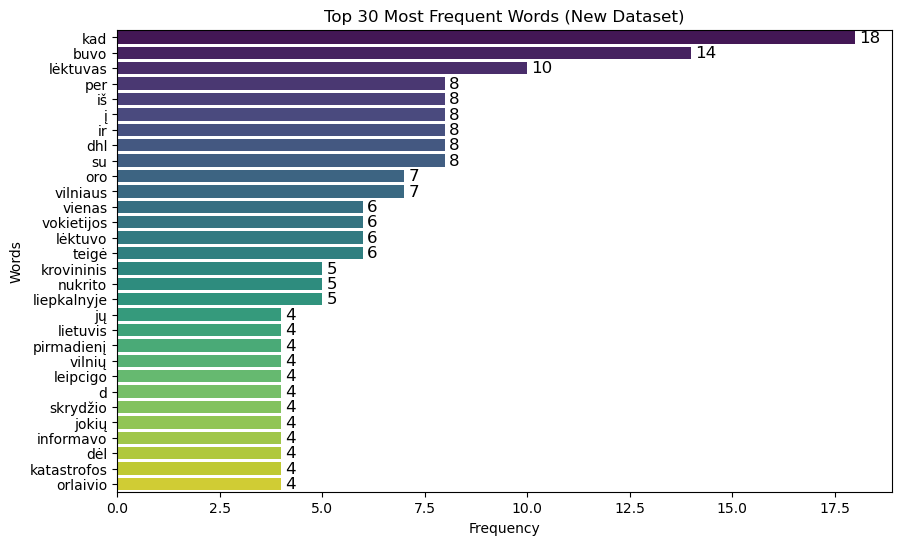

In [68]:
# Vocabulary size & the most frequent words
# Tokenizing the words (+ lowercasing them)
words = []
for sentence in subset_all_sentences:
    words.extend(re.findall(r'\b\w+\b', sentence.lower()))

# Counting the frequency of each word
word_counts = Counter(words)

# Words that appear only once
words_once = [word for word, count in word_counts.items() if count == 1]

# Words that appear more than once and their frequencies
words_more_than_once = {word: count for word, count in word_counts.items() if count > 1}

# Getting the most frequent 30 words
most_common_words = word_counts.most_common(30)

# Separating the words and their frequencies
words, frequencies = zip(*most_common_words)

print(f"Vocabulary size (new dataset): {len(word_counts)}")
print(f"Number of words that appear only once (new dataset) (new dataset): {len(words_once)}")
print(f"Words that appear more than once and their frequencies (new dataset): {words_more_than_once}")

# Plotting the bar chart with the "viridis" color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="viridis")

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words (New Dataset)')

# Adding values on the columns
for i, v in enumerate(frequencies):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)

# Saving the graph
plt.savefig('top_30_most_frequent_words_plot_new.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()

In [69]:
# Getting a list of sentences
combined_sentences = split_and_count(sentences)

# Counting words in each sentence from the selected subset
sentence_lengths = [len(sentence.split()) for sentence in combined_sentences]

# Computing the average sentence length for the subset
average_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

print(f"Average sentence length for the whole dataset is {average_length:.2f} words.")

Average sentence length for the whole dataset is 4.48 words.


Vocabulary size (combined dataset): 1209
Number of words that appear only once (combined dataset): 649
Words that appear more than once and their frequencies (combined dataset): {'vilniuje': 4, 'štai': 11, 'adresas': 3, 'kur': 15, 'gyvena': 3, 'sigita': 2, 'aš': 70, 'atsiprašau': 4, 'o': 39, 'kas': 16, 'jūs': 37, 'alio': 2, 'esu': 3, 'iš': 17, 'lietuvos': 3, 'sveiki': 2, 'į': 25, 'vilnių': 5, 'jums': 8, 'kambarys': 6, 'viešbutyje': 2, 'viešbutis': 5, 'nedidelis': 2, 'jis': 18, 'mažas': 2, 'bet': 19, 'yra': 9, 'netoli': 3, 'už': 8, 'dešinėje': 3, 'iki': 5, 'jus': 6, 'jūsų': 15, 'laukiau': 2, 'ar': 49, 'turite': 11, 'kambario': 4, 'numeris': 2, 'septintas': 2, 'aukšte': 4, 'puikus': 3, 'viena': 5, 'norite': 5, 'antrą': 2, 'ne': 27, 'ačiū': 20, 'šalia': 3, 'taip': 36, 'būtų': 5, 'gerai': 14, 'ir': 55, 'rankšluostis': 2, 'didelis': 3, 'nuostabu': 2, 'negerai': 3, 'negaliu': 4, 'gatvėje': 3, 'mano': 10, 'labas': 5, 'rytas': 5, 'miegojote': 2, 'oras': 5, 'puiki': 3, 'diena': 8, 'jau': 8, 'ga

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_7262/941179695.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


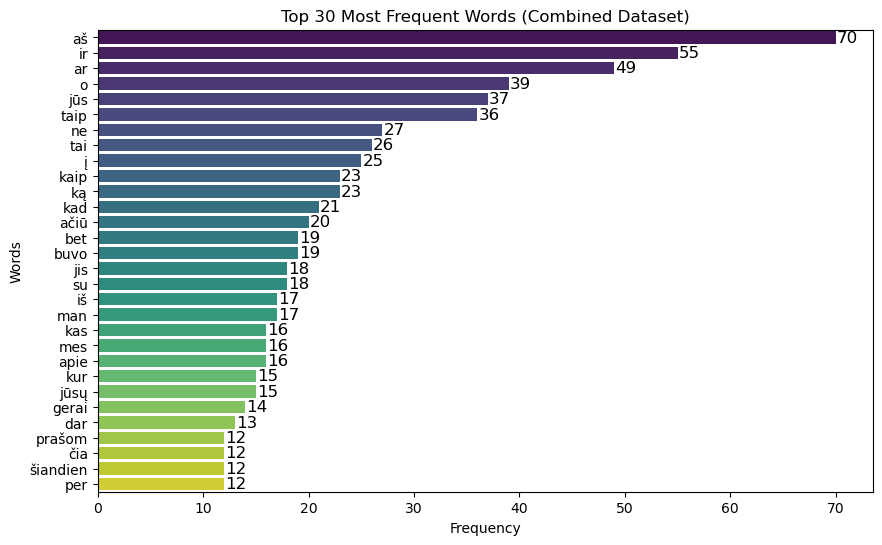

In [70]:
# Vocabulary size & the most frequent words
# Tokenizing the words (+ lowercasing them)
words = []
for sentence in combined_sentences:
    words.extend(re.findall(r'\b\w+\b', sentence.lower()))

# Counting the frequency of each word
word_counts = Counter(words)

# Words that appear only once
words_once = [word for word, count in word_counts.items() if count == 1]

# Words that appear more than once and their frequencies
words_more_than_once = {word: count for word, count in word_counts.items() if count > 1}

# Getting the most frequent 30 words
most_common_words = word_counts.most_common(30)

# Separating the words and their frequencies
words, frequencies = zip(*most_common_words)

print(f"Vocabulary size (combined dataset): {len(word_counts)}")
print(f"Number of words that appear only once (combined dataset): {len(words_once)}")
print(f"Words that appear more than once and their frequencies (combined dataset): {words_more_than_once}")

# Plotting the bar chart with the "viridis" color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="viridis")

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words (Combined Dataset)')

# Adding values on the columns
for i, v in enumerate(frequencies):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)

# Saving the graph
plt.savefig('top_30_most_frequent_words_plot_combined.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()

In [71]:
# POS tagging
pos_tags = []
for sentence in combined_sentences:
    doc = nlp(sentence)
    for sentence in doc.sentences:
        for word in sentence.words:
            print(f"Word: {word.text}, POS: {word.upos}")
            pos_tags.append(word.upos)
            # Counting the frequency of each POS tag
pos_counts = Counter(pos_tags)

Word: Sutikimas, POS: NOUN
Word: Vilniuje, POS: PROPN
Word: Štai, POS: PART
Word: adresas, POS: NOUN
Word: Kur, POS: ADV
Word: gyvena, POS: VERB
Word: Sigita, POS: PROPN
Word: Aš, POS: PRON
Word: ieškau, POS: VERB
Word: Sigitos, POS: NOUN
Word: Minutėlę, POS: NOUN
Word: Atsiprašau, POS: VERB
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kas, POS: PRON
Word: Jūs, POS: PRON
Word: Alio, POS: NOUN
Word: ,, POS: PUNCT
Word: aš, POS: PRON
Word: esu, POS: AUX
Word: Jonas, POS: PROPN
Word: Vasiliauskas, POS: PROPN
Word: Aš, POS: PRON
Word: esu, POS: AUX
Word: iš, POS: ADP
Word: Lietuvos, POS: PROPN
Word: Sveiki, POS: ADJ
Word: atvykę, POS: VERB
Word: į, POS: ADP
Word: Vilnių, POS: PROPN
Word: Jums, POS: PRON
Word: užsakytas, POS: VERB
Word: kambarys, POS: NOUN
Word: viešbutyje, POS: NOUN
Word: Viešbutis, POS: NOUN
Word: vadinasi, POS: VERB
Word: ", POS: PUNCT
Word: Žaliasis, POS: ADJ
Word: tiltas, POS: NOUN
Word: ", POS: PUNCT
Word: Viešbutis, POS: NOUN
Word: nedidelis, POS: ADJ
Word: Jis, POS

Word: Prie, POS: ADP
Word: pirmo, POS: NUM
Word: prekystalio, POS: NOUN
Word: Kada, POS: ADV
Word: Tiksliai, POS: ADV
Word: dešimtą, POS: NOUN
Word: Ar, POS: PART
Word: tinka, POS: VERB
Word: Kiek, POS: ADV
Word: dabar, POS: ADV
Word: Greitai, POS: ADV
Word: dešimt, POS: NUM
Word: Iki, POS: ADP
Word: Greitai, POS: ADV
Word: pasimatysime, POS: VERB
Word: Turguje, POS: NOUN
Word: Ach, POS: X
Word: ,, POS: PUNCT
Word: kaip, POS: SCONJ
Word: puikiai, POS: ADV
Word: kvepia, POS: VERB
Word: braškės, POS: NOUN
Word: O, POS: CCONJ
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: mano, POS: PRON
Word: mėgstamiausios, POS: ADJ
Word: uogos, POS: NOUN
Word: Bet, POS: CCONJ
Word: Ana, POS: NOUN
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: ne, POS: PART
Word: šviežios, POS: ADJ
Word: Ne, POS: PART
Word: šviežios, POS: ADJ
Word: Kaip, POS: ADV
Word: gaila, POS: ADV
Word: Prie, POS: ADP
Word: daržovių, POS: NOUN
Word: prekystalio, POS: ADJ
Word: Man, POS: PRON
Word: prašau, POS: VERB
Word: ilg

Word: Viešbutis, POS: NOUN
Word: Astorija, POS: PROPN
Word: ,, POS: PUNCT
Word: Berlynas, POS: PROPN
Word: Kuo, POS: PRON
Word: galiu, POS: VERB
Word: Jums, POS: PRON
Word: padėti, POS: VERB
Word: Ar, POS: PART
Word: turite, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: turime, POS: VERB
Word: Kada, POS: ADV
Word: norėsite, POS: VERB
Word: Rytoj, POS: PRON
Word: vakare, POS: NOUN
Word: iki, POS: ADP
Word: ketvirtadienio, POS: NOUN
Word: ,, POS: PUNCT
Word: vienai, POS: DET
Word: nakčiai, POS: NOUN
Word: Taip, POS: PART
Word: dar, POS: X
Word: turime, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Kokio, POS: DET
Word: Jūs, POS: PRON
Word: norėtumėte, POS: VERB
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Jūsų, POS: PRON
Word: pavardė, POS: NOUN
Word: Vilsonas, POS: PRO

Word: Ach, POS: X
Word: ,, POS: PUNCT
Word: išsiųskite, POS: VERB
Word: mums, POS: PRON
Word: ,, POS: PUNCT
Word: jeigu, POS: SCONJ
Word: Jūs, POS: PRON
Word: jų, POS: PRON
Word: nenorite, POS: VERB
Word: Viso, POS: DET
Word: gero, POS: ADV
Word: Aš, POS: PRON
Word: tiesiog, POS: ADV
Word: nežinau, POS: VERB
Word: ,, POS: PUNCT
Word: ką, POS: PRON
Word: pasakyti, POS: VERB
Word: Bet, POS: CCONJ
Word: ką, POS: PRON
Word: aš, POS: PRON
Word: galiu, POS: VERB
Word: padaryti, POS: VERB
Word: Susitikimas, POS: NOUN
Word: lėktuve, POS: NOUN
Word: Sveika, POS: ADJ
Word: ,, POS: PUNCT
Word: ponia, POS: NOUN
Word: Šmidt, POS: PUNCT
Word: Koks, POS: DET
Word: netikėtumas, POS: NOUN
Word: Jus, POS: PRON
Word: čia, POS: ADV
Word: lėktuve, POS: NOUN
Word: sutikti, POS: VERB
Word: Tikrai, POS: ADV
Word: Kaip, POS: ADV
Word: sekasi, POS: VERB
Word: Puikiai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: Jums, POS: PRON
Word: Kur, POS: ADV
Word: Jūs, POS: PRON
Word: vykstate, POS: VERB
Word: R

Word: Jam, POS: PRON
Word: sekasi, POS: VERB
Word: šiemet, POS: PUNCT
Word: Apibūdinti, POS: VERB
Word: asmenį, POS: NOUN
Word: Ar, POS: PART
Word: negalėtum, POS: VERB
Word: 12, POS: NUM
Word: 57, POS: NUM
Word: sutikti, POS: VERB
Word: mano, POS: PRON
Word: dėdę, POS: NOUN
Word: Aš, POS: PRON
Word: neturiu, POS: VERB
Word: laiko, POS: NOUN
Word: Turi, POS: VERB
Word: galvoje, POS: NOUN
Word: ,, POS: PUNCT
Word: nuo, POS: ADP
Word: stoties, POS: NOUN
Word: Na, POS: INTJ
Word: gerai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kaip, POS: SCONJ
Word: jis, POS: PRON
Word: atrodo, POS: VERB
Word: Jis, POS: PRON
Word: labai, POS: ADV
Word: aukštas, POS: ADJ
Word: ,, POS: PUNCT
Word: apie, POS: ADP
Word: 1,8, POS: NUM
Word: m, POS: NOUN
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: pilnas, POS: ADJ
Word: Ar, POS: PART
Word: jis, POS: PRON
Word: nešioja, POS: VERB
Word: akinius, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: jis, POS: PRON
Word: visada, POS: ADV
Word: a

Word: Ji, POS: PRON
Word: gana, POS: ADV
Word: garsi, POS: ADJ
Word: Visi, POS: DET
Word: daiktai, POS: NOUN
Word: originalūs, POS: ADJ
Word: ,, POS: PUNCT
Word: iš, POS: ADP
Word: 18, POS: NUM
Word: amžiaus, POS: NOUN
Word: Aš, POS: PRON
Word: girdėjau, POS: VERB
Word: apie, POS: ADP
Word: tai, POS: DET
Word: Tikiuosi, POS: VERB
Word: ,, POS: PUNCT
Word: mes, POS: PRON
Word: jų, POS: PRON
Word: nesudaužysime, POS: VERB
Word: Nesijaudink, POS: VERB
Word: Jie, POS: PRON
Word: visi, POS: DET
Word: po, POS: ADP
Word: stiklu, POS: NOUN
Word: Vėlavimas, POS: NOUN
Word: į, POS: ADP
Word: susitikimą, POS: NOUN
Word: Jau, POS: ADV
Word: 20, POS: NUM
Word: minučių, POS: NOUN
Word: po, POS: ADP
Word: dvyliktos, POS: NOUN
Word: Aš, POS: PRON
Word: Jūsų, POS: PRON
Word: laukiau, POS: VERB
Word: dvyliktą, POS: PROPN
Word: Bet, POS: CCONJ
Word: Jūs, POS: PRON
Word: gi, POS: PART
Word: uždusęs, POS: VERB
Word: Atsiprašau, POS: VERB
Word: ,, POS: PUNCT
Word: bet, POS: CCONJ
Word: man, POS: PRON
Word: 

Word: Ką, POS: PRON
Word: mes, POS: PRON
Word: darysime, POS: VERB
Word: šį, POS: DET
Word: vakarą, POS: NOUN
Word: Gal, POS: PART
Word: eisime, POS: VERB
Word: į, POS: ADP
Word: kiną, POS: NOUN
Word: ar, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: dar, POS: PART
Word: gauti, POS: VERB
Word: bilietus, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: ir, POS: CCONJ
Word: pašokti, POS: VERB
Word: nueiti, POS: VERB
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: viską, POS: PRON
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: baletą, POS: NOUN
Word: ir, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: ir, POS: CCONJ
Word: kiną, POS: NOUN
Word: ;, POS: PUNCT
Word: sugalvok, POS: VERB
Word: ,, POS: PUNCT
Word: ką, POS: PRON
Word: mes, POS: PRON
Word: darysime, POS: VERB
Word: Aš, POS: PRON
Word: tiesiog, POS: ADV
Word: norėčiau, POS: VERB
Word: kur, POS: ADV
Word: nors, POS: X
Word: išeiti, POS: VERB
Word: Piteris, POS: PROPN
Word: pris

Word: Bendrovės, POS: NOUN
Word: DHL, POS: X
Word: užsakomuosius, POS: VERB
Word: skrydžius, POS: NOUN
Word: vykdė, POS: VERB
Word: lėktuvas, POS: NOUN
Word: ,, POS: PUNCT
Word: priklausęs, POS: VERB
Word: Ispanijos, POS: PROPN
Word: oro, POS: NOUN
Word: linijoms, POS: NOUN
Word: „, POS: PUNCT
Word: Swiftair, POS: ADV
Word: “, POS: PUNCT
Word: Internete, POS: NOUN
Word: pasirodžius, POS: VERB
Word: pilotų, POS: NOUN
Word: ir, POS: CCONJ
Word: skrydžio, POS: NOUN
Word: vadovo, POS: NOUN
Word: garso, POS: NOUN
Word: įrašui, POS: NOUN
Word: ,, POS: PUNCT
Word: pastebėta, POS: VERB
Word: ,, POS: PUNCT
Word: kad, POS: SCONJ
Word: pokalbis, POS: NOUN
Word: buvo, POS: AUX
Word: visiškai, POS: ADV
Word: rutininis, POS: ADJ
Word: ,, POS: PUNCT
Word: nefiksuota, POS: VERB
Word: jokių, POS: DET
Word: nerimo, POS: NOUN
Word: ženklų, POS: NOUN
Word: DHL, POS: X
Word: informavo, POS: VERB
Word: ,, POS: PUNCT
Word: kad, POS: SCONJ
Word: dėl, POS: ADP
Word: lėktuvo, POS: NOUN
Word: katastrofos, POS: N

Word: Prieš, POS: ADP
Word: skrydį, POS: NOUN
Word: į, POS: ADP
Word: Vilnių, POS: PROPN
Word: lėktuvas, POS: NOUN
Word: dvi, POS: NUM
Word: dienas, POS: NOUN
Word: ,, POS: PUNCT
Word: lapkričio, POS: NOUN
Word: 23–24, POS: NUM
Word: d, POS: X
Word: ,, POS: PUNCT
Word: Leipcigo, POS: PROPN
Word: oro, POS: NOUN
Word: uoste, POS: NOUN
Word: stovėjo, POS: VERB
Word: nenaudojamas, POS: VERB
Word: ,, POS: PUNCT
Word: nors, POS: SCONJ
Word: įprastai, POS: ADV
Word: orlaiviu, POS: NOUN
Word: buvo, POS: AUX
Word: skraidoma, POS: VERB
Word: kasdien, POS: ADV
Word: Lėktuvas, POS: NOUN
Word: nukrito, POS: VERB
Word: Liepkalnyje, POS: NOUN
Word: ,, POS: PUNCT
Word: ties, POS: ADP
Word: Žirnių, POS: NOUN
Word: ir, POS: CCONJ
Word: Liepkalnio, POS: PROPN
Word: gatvėmis, POS: NOUN
Word: Bendrovės, POS: NOUN
Word: DHL, POS: X
Word: užsakomuosius, POS: VERB
Word: skrydžius, POS: NOUN
Word: vykdė, POS: VERB
Word: lėktuvas, POS: NOUN
Word: ,, POS: PUNCT
Word: priklausęs, POS: VERB
Word: Ispanijos, POS: P

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_7262/3483164574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")


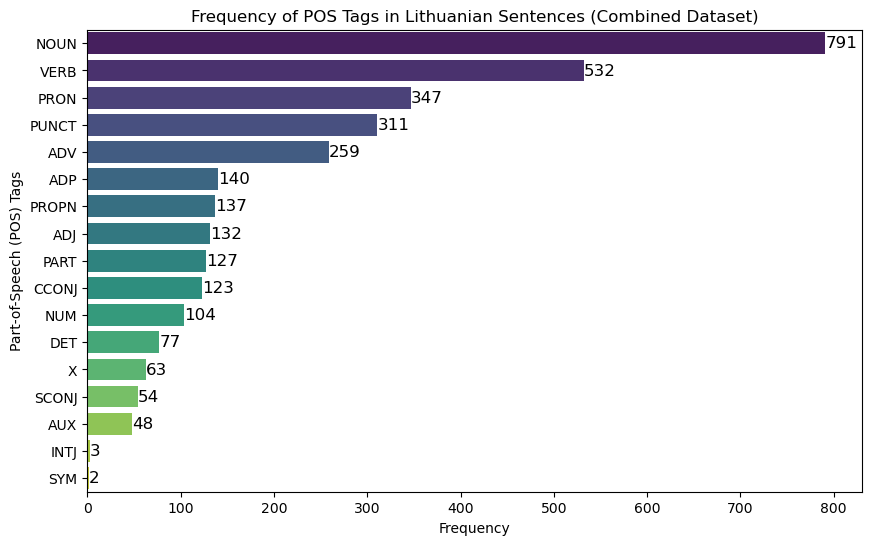

In [72]:
# Creating a DataFrame with POS tags and their frequencies
df = pd.DataFrame(pos_counts.items(), columns = ["POS", "Frequency"])

# Sorting the DataFrame by frequency
df = df.sort_values(by = "Frequency", ascending = False)

# Plotting the bar chart
plt.figure(figsize = (10, 6))  # Set the figure size
ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Part-of-Speech (POS) Tags")
plt.title("Frequency of POS Tags in Lithuanian Sentences (Combined Dataset)")

# Adding values on the columns
for i, v in enumerate(df["Frequency"]):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)
    
# Saving the graph
plt.savefig('pos_tag_frequency_plot_combined.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()